In [47]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [2]:
data1 = pd.read_csv("Sales - Data Modelling Example.csv")

In [14]:
data1.head()

,LineID,Order ID,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Country,Region,State,Postal Code,Product Name,Customer Name,Sales,Quantity,Profit,Discount
0,1,CA-2017-152156,2017-08-11,11/11/2017 00:00,Second Class,Furniture,Bookcases,United States,South,Kentucky,42420.0,Bush Somerset Collection Bookcase,Claire Gute,261.9600,2,41.9136,0.00
1,2,CA-2017-152156,2017-08-11,11/11/2017 00:00,Second Class,Furniture,Chairs,United States,South,Kentucky,42420.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,731.9400,3,219.5820,0.00
2,3,CA-2017-138688,2017-12-06,16/06/2017 00:00,Second Class,Office Supplies,Labels,United States,West,California,90036.0,Self-Adhesive Address Labels for Typewriters b...,Darrin Van Huff,14.6200,2,6.8714,0.00
3,4,US-2016-108966,2016-11-10,18/10/2016 00:00,Standard Class,Furniture,Tables,United States,South,Florida,33311.0,Bretford CR4500 Series Slim Rectangular Table,Sean O'Donnell,957.5775,5,-383.0310,0.45
4,5,US-2016-108966,2016-11-10,18/10/2016 00:00,Standard Class,Office Supplies,Storage,United States,South,Florida,33311.0,Eldon Fold 'N Roll Cart System,Sean O'Donnell,22.3680,2,2.5164,0.20


In [4]:
data = pd.read_csv("Superstore_Sales.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      793 non-null    object
 1   max_order_date     793 non-null    object
 2   last_order_date    793 non-null    object
 3   MonetaryValue      793 non-null    int64 
 4   Frequency          793 non-null    int64 
 5   Recency            793 non-null    int64 
 6   rfm_Recency        793 non-null    int64 
 7   rfm_Frequency      793 non-null    int64 
 8   rfm_MonetaryValue  793 non-null    int64 
 9   rfm_code           793 non-null    int64 
 10  rfm_string_code    793 non-null    int64 
 11  Profit             793 non-null    int64 
 12  Quantity           793 non-null    int64 
 13  Total_Sales        793 non-null    int64 
 14  Discount           793 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 93.1+ KB


## Customer Livetime Value

In [18]:
import pandas as pd
from datetime import datetime

# assuming your dataframe is named "df"
data1['Order_Date'] = pd.to_datetime(data1['Order Date'], format='%Y-%m-%d')
data1['Customer_Start_Date'] = data1.groupby('Customer Name')['Order_Date'].transform('min')
data1['Days_In_Company'] = (data1['Order_Date'] - data1['Customer_Start_Date']).dt.days


In [21]:
data["Days_In_Company"]= data1["Days_In_Company"]

In [23]:
data.head(2)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount,Days_In_Company
0,Aaron Bergman,2018-12-30 00:00:00.0000000,2017-11-10 00:00:00.0000000,143818,6,415,1,1,1,3,111,1293465,13,143818,4,300
1,Aaron Hawkins,2018-12-30 00:00:00.0000000,2018-12-18 00:00:00.0000000,464630,11,12,5,3,2,10,532,1776741,54,464630,10,300


In [48]:
num_transactions = data1.groupby('Customer Name')['Order Date'].count()
df2 = data[["Customer_Name","Days_In_Company","Quantity","Total_Sales"]]
# Add a new column to the DataFrame with the number of transactions for each customer
df2['num_transactions'] = data1['Customer Name'].map(num_transactions)

In [29]:
df2 = df2[df2["Quantity"]>0]

In [30]:
df2["AOV"] = df2["Total_Sales"] / df2["num_transactions"]

In [31]:
df2.head()

,Customer_Name,Days_In_Company,Quantity,Total_Sales,num_transactions,AOV
0,Aaron Bergman,300,13,143818,5,28763.600000
1,Aaron Hawkins,300,54,464630,5,92926.000000
2,Aaron Smayling,74,48,2257567,9,250840.777778
3,Adam Bellavance,212,56,5110574,15,340704.933333
4,Adam Hart,212,75,2343506,15,156233.733333


In [32]:
# calculate the purchase frequency across all data
purchase_freq = sum(df2["num_transactions"]) / len(df2)
purchase_freq

15.58890290037831

In [33]:
#calculate repeat rate
repeat_rate = df2[df2["num_transactions"]>1].shape[0]/df2.shape[0]
repeat_rate

1.0

In [34]:
#calculate the churn rate
churn_rate = 1-repeat_rate
churn_rate

0.0

In [36]:
df2["profit_margin"] = df2["Total_Sales"]*.10

In [37]:
df2["CLV"] = ((df2["AOV"]*purchase_freq)/churn_rate)*.10
df2

,Customer_Name,Days_In_Company,Quantity,Total_Sales,num_transactions,AOV,profit_margin,CLV
0,Aaron Bergman,300,13,143818,5,28763.600000,14381.8,inf
1,Aaron Hawkins,300,54,464630,5,92926.000000,46463.0,inf
2,Aaron Smayling,74,48,2257567,9,250840.777778,225756.7,inf
3,Adam Bellavance,212,56,5110574,15,340704.933333,511057.4,inf
4,Adam Hart,212,75,2343506,15,156233.733333,234350.6,inf
...,...,...,...,...,...,...,...,...
788,Xylona Preis,490,100,1005065,21,47860.238095,100506.5,inf
789,Yana Sorensen,490,58,3561381,21,169589.571429,356138.1,inf
790,Yoseph Carroll,490,31,1920626,21,91458.380952,192062.6,inf
791,Zuschuss Carroll,490,105,3383039,21,161097.095238,338303.9,inf


In [38]:
print("median CLV is", df2["CLV"].median())
print("mean CLV is", df2["CLV"].mean())

median CLV is inf
mean CLV is inf


## Customer Segmentation 

### RFM Analysis

RFM analysis is a marketing technique used to analyze customer behavior based on three factors: Recency, Frequency, and Monetary value of purchases. It helps businesses identify their most valuable customers and design targeted marketing strategies.

We segment the customers into groups of certain similarities to get a broad view of customers spread. Then we can begin to answer some business questions

In [41]:
rfm_df = data[[ 'rfm_Recency', 'rfm_Frequency',
       'rfm_MonetaryValue']]
rfm_df.head()

,rfm_Recency,rfm_Frequency,rfm_MonetaryValue
0,1,1,1
1,5,3,2
2,3,2,5
3,3,5,5
4,4,5,5


In [42]:
# scale the dataframe
scaler = StandardScaler()
scaled_df = scaler.fit_transform(rfm_df)

First, we run a range of different K-values to find the optimal K

In [49]:
inertia = []
val_range = range(1,11)
for i in val_range:
    kmean = KMeans(n_clusters=i)
    kmean.fit(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

inertia

[2379.0,
 1437.9549753478614,
 1087.0645611541615,
 851.7241890823211,
 721.8205635334946,
 621.9010602048684,
 562.12518808507,
 481.4157826014613,
 452.042623804014,
 421.40990722349704]

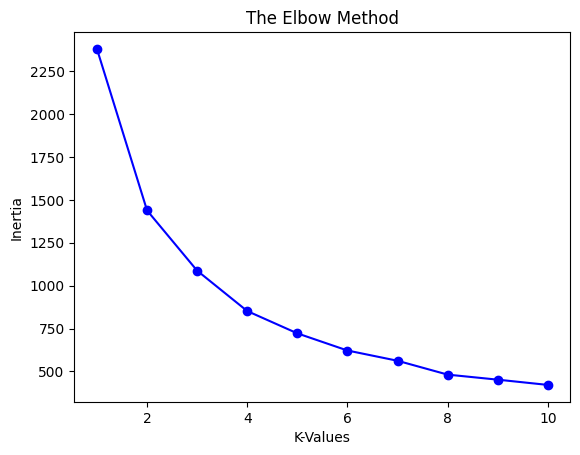

In [50]:
plt.plot(val_range,inertia,'bo-')
plt.xlabel('K-Values') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method') 
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42)           
kmeans.fit_predict(scaled_df)         
labels = kmeans.labels_
kmeans.inertia_

851.7241890823211

Let's plot view the clusters using PCA. We use PCA to reduce the number of dimensions,i.e, the number of columns down to two.

In [52]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-2.405438,-0.416049
1,0.163268,1.559841
2,0.414473,-0.483993
3,1.817115,-0.839744
4,2.115835,-0.211059
...,...,...
788,1.238373,0.392306
789,1.479461,0.654793
790,0.573183,1.075060
791,1.817115,-0.839744


In [53]:
pca_df["cluster"] = labels
pca_df

,PCA1,PCA2,cluster
0,-2.405438,-0.416049,2
1,0.163268,1.559841,3
2,0.414473,-0.483993,1
3,1.817115,-0.839744,0
4,2.115835,-0.211059,0
...,...,...,...
788,1.238373,0.392306,0
789,1.479461,0.654793,0
790,0.573183,1.075060,3
791,1.817115,-0.839744,0


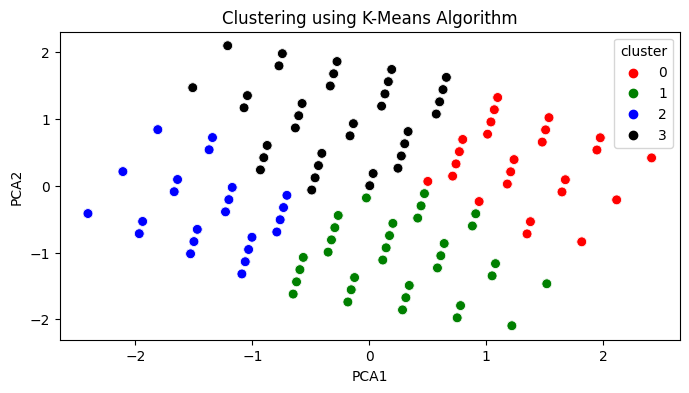

In [54]:
# plot the clusters
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df, \
                     palette=['red', 'green', 'blue', 'black'], s=50)
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [55]:
# add the the labels to rfm_df to see each customer and their corresponding label/group.
clustered_df = rfm_df.copy()
clustered_df["cluster"] = labels

In [56]:
# check the mean of each feature for each group
clustered_df.groupby("cluster").mean()

,rfm_Recency,rfm_Frequency,rfm_MonetaryValue
cluster,,,
0,4.168269,4.389423,4.216346
1,1.853933,3.634831,3.949438
2,1.614213,1.573604,1.619289
3,4.100000,2.409524,2.271429


In [ ]:
def get_status(row):
    if row["cluster"] == 0:
        return "Loyal"
    elif row["cluster"] == 1:
        return "hybernating"
    elif row["cluster"] == 2:
        return "loyal"
    else:
        return "New"
      
clustered_df["Cus_status"] = clustered_df.apply(get_status,axis=1)

In [ ]:
clustered_df = clustered_df.reset_index()
clustered_df.head(3)

In [ ]:
clustered_df["Cus_status"].value_counts()

In [ ]:
sns.countplot(x='Cus_status', data=clustered_df)
plt.show()